In [194]:
# Import all required modules
# Disable warnings
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")
# Import plotting modules and set up
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams

In [244]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context(
"notebook", font_scale=1.5, rc={"figure.figsize": (8, 5), "axes.titlesize": 14}
)
rcParams["figure.figsize"] = 8, 5

In [196]:
DATA_PATH = "../data/ba_reviews.csv"

In [197]:
reviews = pd.read_csv(DATA_PATH)

In [198]:
reviews

,Rating,Review Title,Date,Reviews
0,9,happy to recommend BA,18th June 2024,✅ Trip Verified | Four very pleasant on time flights with friendly helpful staff. The guy on t...
1,2,"cancelled our return flight""",18th June 2024,Not Verified | We travel extensively over 25 years and tend to use BA on our regular trips wh...
2,8,Very good experience all round,17th June 2024,✅ Trip Verified | Flight delayed an hour due to bad weather around JFK however this was made u...
3,7,inflight service was efficient and friendly,17th June 2024,✅ Trip Verified | A very full flight made Premium Economy feel a little less premium than you ...
4,1,worst airline I’ve ever flown,16th June 2024,✅ Trip Verified | The worst airline I’ve ever flown. Could not check in until my flight was ope...
...,...,...,...,...
3855,1,ritish Airways customer revie,29th August 2012,This was a bmi Regional operated flight on a RJ145 from Manchester to Heathrow - but with a BA ...
3856,9,ritish Airways customer revie,28th August 2012,LHR to HAM. Purser addresses all club passengers by name boarding a little late but left on tim...
3857,5,ritish Airways customer revie,12th October 2011,My son who had worked for British Airways urged me to fly British Airways to Kansas City. He re...
3858,4,ritish Airways customer revie,11th October 2011,London City-New York JFK via Shannon on A318 but had really nice seats and professional crew. M...


In [199]:
reviews.columns

Index(['Rating', ' Review Title', ' Date', ' Reviews'], dtype='object')

In [200]:
def remove_white_space(column):
    return column.strip()

reviews = reviews.rename(columns=remove_white_space)

In [201]:
reviews.columns

Index(['Rating', 'Review Title', 'Date', 'Reviews'], dtype='object')

In [202]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        3846 non-null   object
 1   Review Title  3829 non-null   object
 2   Date          3815 non-null   object
 3   Reviews       3801 non-null   object
dtypes: object(4)
memory usage: 120.8+ KB


### Handling null values

In [203]:
print(reviews.isnull().sum())

Rating          14
Review Title    31
Date            45
Reviews         59
dtype: int64


In [204]:
reviews[reviews['Rating'].isnull()]

,Rating,Review Title,Date,Reviews
907,NaN,23rd August 2019,✅ Trip Verified | My flight was cancelled 3 days in a row. Was flying out on Thursday and final...,NaN
947,NaN,20th July 2019,✅ Trip Verified | I flew yesterday from Heathrow to Manchester in business class from start to...,NaN
1118,NaN,23rd January 2019,✅ Trip Verified | Antigua to Gatwick. Apparently it is necessary to pay extra to get a decent ...,NaN
1163,NaN,9th December 2018,✅ Trip Verified |,NaN
1210,NaN,1st October 2018,✅ Trip Verified | London to Bangkok. Flew British Airways for the first time in a couple of ye...,NaN
1282,NaN,15th July 2018,✅ Trip Verified | Munich to London Heathrow with British Airways. I booked my flight online ab...,NaN
1304,NaN,22nd June 2018,✅ Trip Verified | We can not fault the new 'Club World' food and service on the 747 outbound an...,NaN
1379,NaN,13th April 2018,✅ Trip Verified | Flew Belfast to London with British Airways. Stressful day started with a 2.5...,NaN
1425,NaN,22nd February 2018,✅ Trip Verified | Could British Airways get any worse? Flew Chicago - London Heathrow in Upper ...,NaN
1427,NaN,22nd February 2018,✅ Trip Verified | Flew on British Airways from Athens to London. The aircraft was a Boeing 757....,NaN


In [205]:
reviews.shape

(3860, 4)

In [206]:
reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors="coerce")

In [207]:
mask = reviews[reviews['Rating'].isnull()]

# removing rows with missing rating value
reviews = reviews.drop(mask.index)

In [208]:
reviews.shape

(3815, 4)

In [209]:
reviews

,Rating,Review Title,Date,Reviews
0,9.0,happy to recommend BA,18th June 2024,✅ Trip Verified | Four very pleasant on time flights with friendly helpful staff. The guy on t...
1,2.0,"cancelled our return flight""",18th June 2024,Not Verified | We travel extensively over 25 years and tend to use BA on our regular trips wh...
2,8.0,Very good experience all round,17th June 2024,✅ Trip Verified | Flight delayed an hour due to bad weather around JFK however this was made u...
3,7.0,inflight service was efficient and friendly,17th June 2024,✅ Trip Verified | A very full flight made Premium Economy feel a little less premium than you ...
4,1.0,worst airline I’ve ever flown,16th June 2024,✅ Trip Verified | The worst airline I’ve ever flown. Could not check in until my flight was ope...
...,...,...,...,...
3855,1.0,ritish Airways customer revie,29th August 2012,This was a bmi Regional operated flight on a RJ145 from Manchester to Heathrow - but with a BA ...
3856,9.0,ritish Airways customer revie,28th August 2012,LHR to HAM. Purser addresses all club passengers by name boarding a little late but left on tim...
3857,5.0,ritish Airways customer revie,12th October 2011,My son who had worked for British Airways urged me to fly British Airways to Kansas City. He re...
3858,4.0,ritish Airways customer revie,11th October 2011,London City-New York JFK via Shannon on A318 but had really nice seats and professional crew. M...


In [210]:
reviews.isnull().sum()

Rating           0
Review Title     0
Date            14
Reviews         14
dtype: int64

In [211]:
reviews[reviews['Reviews'].isnull()]

,Rating,Review Title,Date,Reviews
906,1.0,"flight was cancelled 3 days in a row""",NaN,NaN
946,3.0,"sent to the wrong baggage drop""",NaN,NaN
1117,3.0,"bothered by the adjacent toilets""",NaN,NaN
1162,10.0,"a very enjoyable flight""",NaN,NaN
1209,2.0,"aircraft interior was old""",NaN,NaN
1281,7.0,"crew welcoming and orderly""",NaN,NaN
1303,10.0,"worlds away from what it used to be""",NaN,NaN
1378,1.0,"started with a 2.5 hours delay""",NaN,NaN
1424,1.0,"at least a decade out of date""",NaN,NaN
1426,7.0,"has adopted the low cost airline mentality""",NaN,NaN


In [212]:
mask = reviews[reviews['Reviews'].isnull()]

# removing rows with missing rating value
reviews = reviews.drop(mask.index)

In [213]:
reviews.shape

(3801, 4)

In [214]:
reviews.isnull().sum()

Rating          0
Review Title    0
Date            0
Reviews         0
dtype: int64

### Data processing

In [215]:
reviews[reviews['Review Title'].str[-1] == '"']

,Rating,Review Title,Date,Reviews
1,2.0,"cancelled our return flight""",18th June 2024,Not Verified | We travel extensively over 25 years and tend to use BA on our regular trips wh...
23,2.0,"declined to offer compensation""",5th May 2024,✅ Trip Verified | I flew with British Airways from Heathrow to Hannover. Although the check-i...
29,1.0,"the worst experience""",20th April 2024,✅ Trip Verified | We booked premium economy round trip from Phoenix to Zurich via AA codeshare...
37,8.0,"a really lovely flight""",28th March 2024,✅ Trip Verified | Starting off at Heathrow Terminal 3. Check in was fairly easy but fast track...
40,5.0,"I would say disappointing""",26th March 2024,✅ Trip Verified | Overall I would say disappointing. Due to BA status I had lounge access on ...
47,3.0,"They have a long way to go""",19th March 2024,Not Verified | Not a great experience at all from the outset it was poorly managed as they bu...
50,1.0,"cancelled our return flight""",12th March 2024,✅ Trip Verified | Absolutely horrible customer service - will never fly again. We left Toronto...
52,1.0,"Service extremely inattentive""",10th March 2024,✅ Trip Verified | BA First it's not even the best business class in the sky. Cabin very long i...
57,10.0,"an excellent experience""",2nd March 2024,✅ Trip Verified | I upgraded at check in to Club Europe seat 1D and had an excellent experienc...
64,3.0,"Is this how low BA has fallen?""",17th February 2024,✅ Trip Verified | London Heathrow to Istanbul at the start of the half-term school holidays an...


In [218]:
reviews['Review Title'] = reviews['Review Title'].str.replace('"','')

In [221]:
len(reviews[reviews['Review Title'].str[-1] == '"'])

0

In [222]:
reviews.shape

(3801, 4)

In [224]:
reviews['Rating'].value_counts()

Rating
1.0      897
2.0      434
3.0      420
8.0      381
10.0     331
9.0      321
7.0      317
4.0      257
5.0      239
6.0      199
404.0      5
Name: count, dtype: int64

In [226]:
reviews[reviews['Rating'] == 404]

,Rating,Review Title,Date,Reviews
3280,404.0,ritish Airways customer revie,18th February 2015,Cabin crew polite unfortunately BA ran out of chicken ran out of wine ran out of soft drinks. T...
3414,404.0,ritish Airways customer revie,10th December 2014,Phoenix to London - outbound a wonderful and enjoyable experience. The problem we had started o...
3436,404.0,ritish Airways customer revie,25th November 2014,On past experience I chose BA for our long haul return flight to South America from the UK. Not...
3667,404.0,ritish Airways customer revie,31st July 2014,LHR-CPH-LHR Business Class. This is a joke. Scruffy aircraft with ripped upholstery dirty cabin...
3701,404.0,ritish Airways customer revie,15th July 2014,I flew with British Airways with my mother from Paphos to Manchester. She had a fit to fly cert...


In [227]:
mask = reviews[reviews['Rating'] == 404]

# removing rows with missing rating value
reviews = reviews.drop(mask.index)

In [228]:
len(reviews[reviews['Rating'] == 404])

0

### EDA

In [234]:
reviews['Rating'].value_counts()

Rating
1.0     897
2.0     434
3.0     420
8.0     381
10.0    331
9.0     321
7.0     317
4.0     257
5.0     239
6.0     199
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

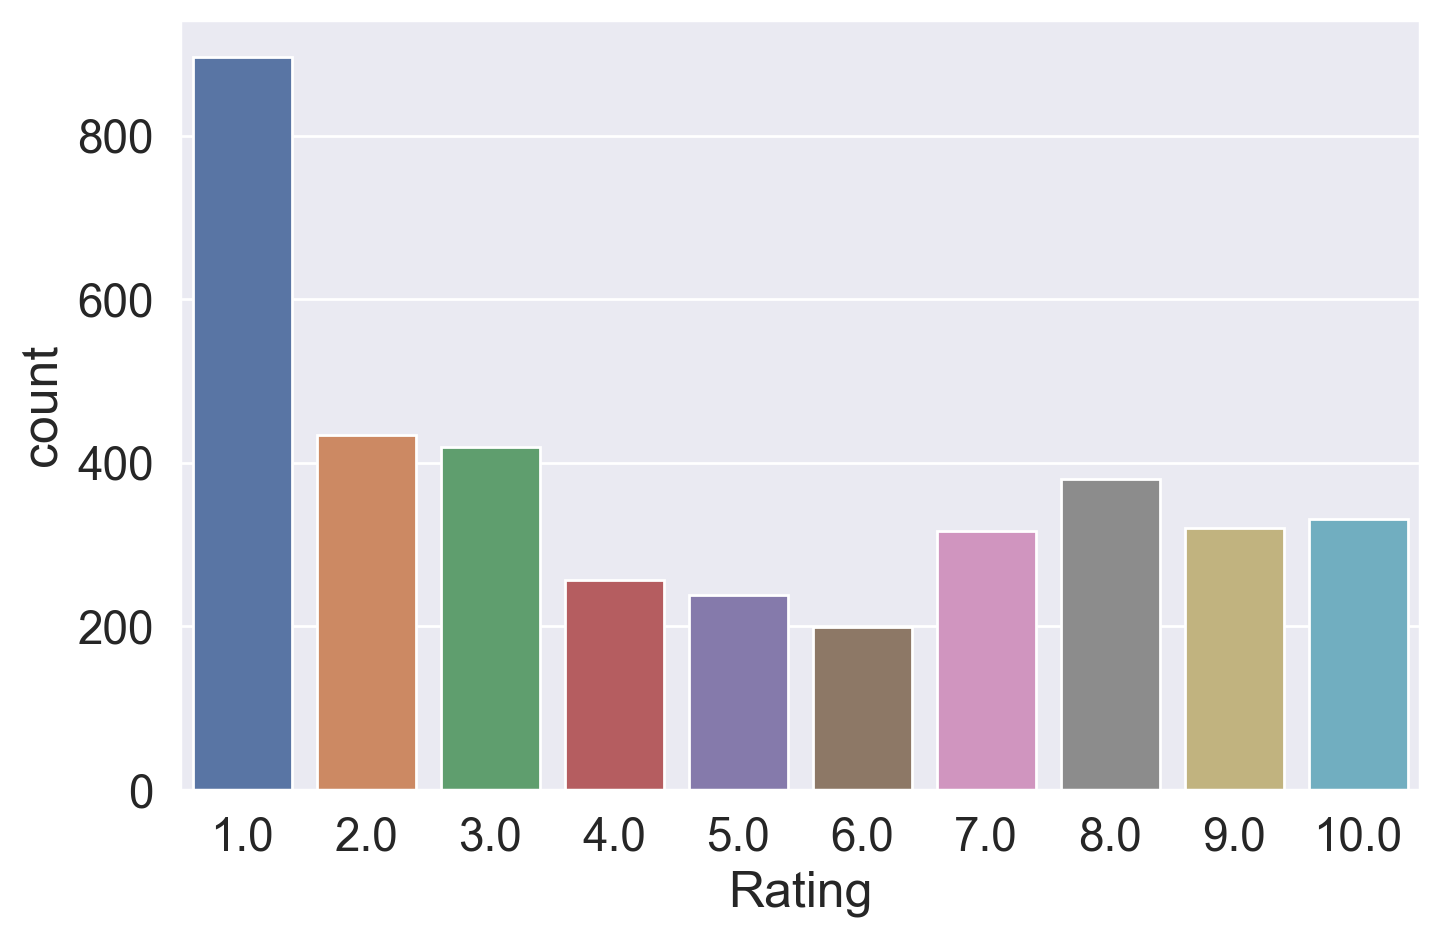

In [248]:
# Choose a plot type (adjust as needed)
sns.countplot(reviews, x="Rating", palette="deep")


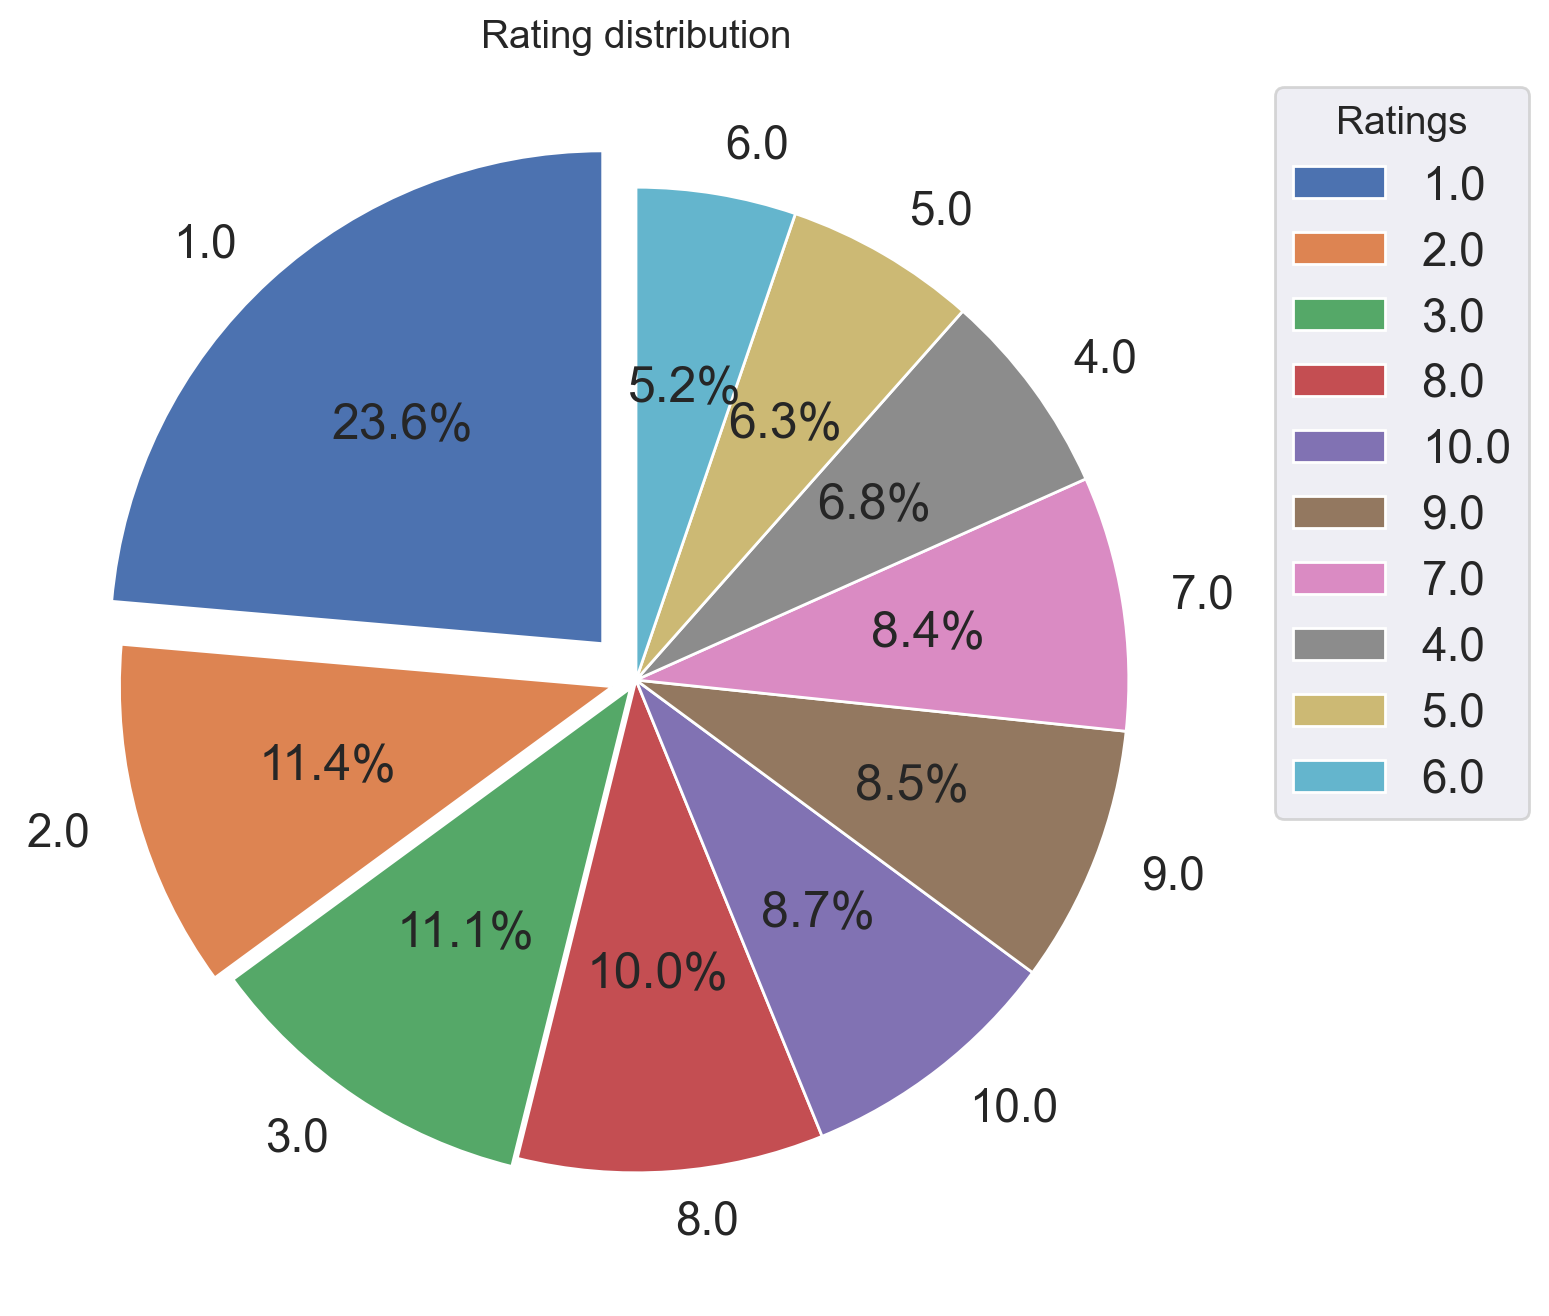

In [286]:
# explode 1st slice
explode = (0.1,0.05,0.02, 0,0,0,0,0,0,0)

labels = reviews['Rating'].value_counts().index.to_list()
plt.figure(figsize=(11, 8))
plt.title("Rating distribution")
plt.pie(reviews['Rating'].value_counts(), explode=explode, startangle=90, autopct='%1.1f%%', labels=labels)

plt.legend(labels=labels, loc="best")
plt.legend(title="Ratings", title_fontsize=14, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()